In [1]:
!gdown 13nWK76wNao9jw_C40KFXgQ984vWqZyay

Downloading...
From: https://drive.google.com/uc?id=13nWK76wNao9jw_C40KFXgQ984vWqZyay
To: /content/results.txt
100% 11.5k/11.5k [00:00<00:00, 15.4MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
results = []

with open('results.txt', 'r') as file:
    for line in file:
        if line != '\n':
            results.append(line.strip())

for index, value in enumerate(results):
    print(index, value)

0 SERIAL MATRIX MULTIPLICATION
1 N = 500
2 total time: 720000 microseconds
3 total time: 710000 microseconds
4 total time: 720000 microseconds
5 total time: 700000 microseconds
6 total time: 730000 microseconds
7 N = 1000
8 total time: 4.7e+06 microseconds
9 total time: 4.72e+06 microseconds
10 total time: 4.88e+06 microseconds
11 total time: 4.72e+06 microseconds
12 total time: 4.69e+06 microseconds
13 N = 1500
14 total time: 3.071e+07 microseconds
15 total time: 2.846e+07 microseconds
16 total time: 3.174e+07 microseconds
17 total time: 2.794e+07 microseconds
18 total time: 3.03e+07 microseconds
19 OPENMP MATRIX MULTIPLICATION
20 N = 500
21 ncores: 1
22 total time: 737008 microseconds
23 total time: 721728 microseconds
24 total time: 738128 microseconds
25 total time: 704864 microseconds
26 total time: 738528 microseconds
27 ncores: 2
28 total time: 397255 microseconds
29 total time: 465337 microseconds
30 total time: 394580 microseconds
31 total time: 412145 microseconds
32 total ti

In [20]:
serial = results[1:19]
openmp_500 = results[21:51]
openmp_1000 = results[52:82]
openmp_1500 = results[83:113]
blas = results[114:132]
mkl = results[133:151]
openmp_1500_any_cpus = results[153:201]
openmp_1500_any = results[203:251]
openmp_1000_any = results[253:]

In [5]:
def results_preprocessing(lst: list):
    tmp = []
    for i in range(len(lst)):
        if i % 6 != 0:
            tmp.append(float(lst[i].split()[2]) / 1e6)
    n_500 = sum(tmp[:5]) / 5
    n_1000 = sum(tmp[5:10]) / 5
    n_1500 = sum(tmp[10:]) / 5
    return n_500, n_1000, n_1500


def plotting(x, y, title, xlabel, ylabel):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

matrix_sizes = np.array([500, 1000, 1500])

results_serial = np.array(results_preprocessing(serial))
results_blas = np.array(results_preprocessing(blas))
results_mkl = np.array(results_preprocessing(mkl))

print(results_serial), print(results_blas), print(results_mkl)

[ 0.716  4.742 29.83 ]
[0.00724131 0.0348244  0.08934732]
[0.01256276 0.03896584 0.09644118]


(None, None, None)

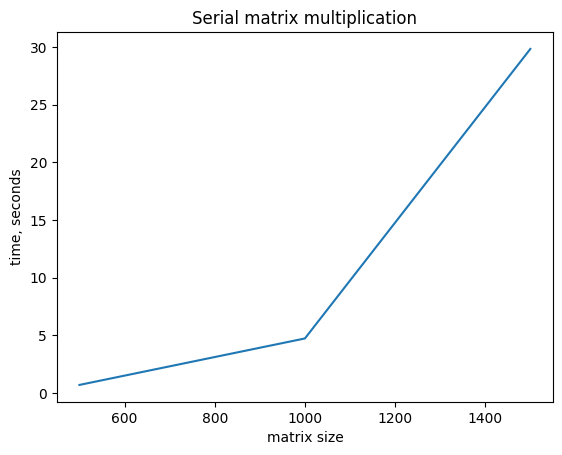

In [6]:
plotting(matrix_sizes, results_serial, 'Serial matrix multiplication', 'matrix size', 'time, seconds')

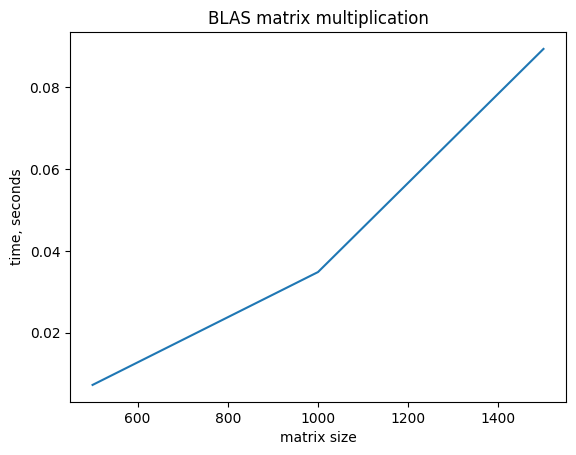

In [7]:
plotting(matrix_sizes, results_blas, 'BLAS matrix multiplication', 'matrix size', 'time, seconds')

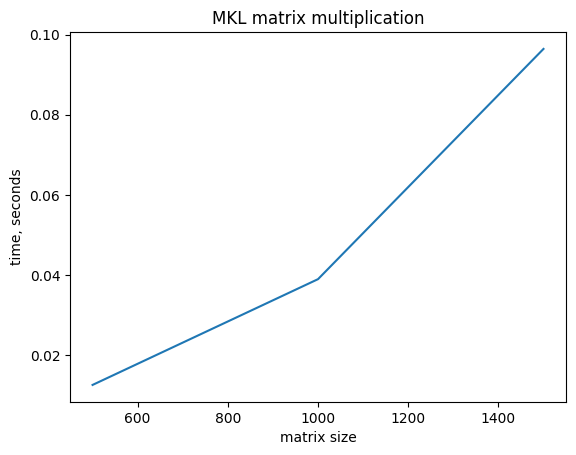

In [8]:
plotting(matrix_sizes, results_mkl, 'MKL matrix multiplication', 'matrix size', 'time, seconds')

In [9]:
def results_preprocessing_openmp(lst: list):
    tmp = []
    for i in range(len(lst)):
        if i % 6 != 0:
            tmp.append(float(lst[i].split()[2]) / 1e6)
    n_1 = sum(tmp[:5]) / 5
    n_2 = sum(tmp[5:10]) / 5
    n_4 = sum(tmp[10:15]) / 5
    n_8 = sum(tmp[15:20]) / 5
    n_16 = sum(tmp[20:]) / 5
    return n_1, n_2, n_4, n_8, n_16


def plotting_openmp(x, y, title, xlabel, ylabel):
    scalability = y[0] / y
    plt.plot(x, scalability, label='practical')
    plt.plot(x, x, label='theoretical')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


ncores = np.array([1, 2, 4, 8, 16])

openmp_500 = np.array(results_preprocessing_openmp(openmp_500))
openmp_1000 = np.array(results_preprocessing_openmp(openmp_1000))
openmp_1500 = np.array(results_preprocessing_openmp(openmp_1500))

print(openmp_500), print(openmp_1000), print(openmp_1500)

[0.7280512 0.413027  0.2546172 0.1893708 0.1324742]
[5.24985   2.660222  1.356264  0.78525   0.6329972]
[29.0108   15.61554   8.02926   3.774528  2.211238]


(None, None, None)

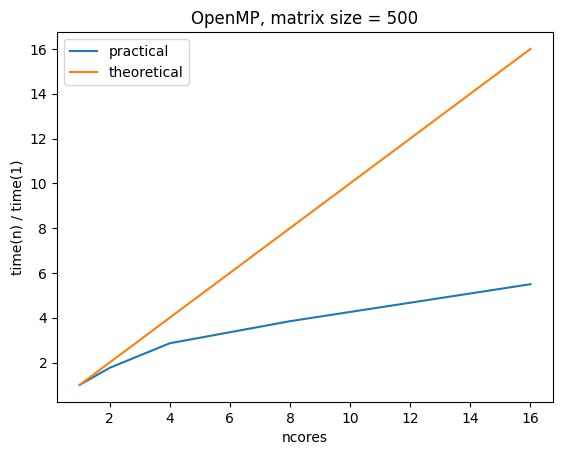

In [10]:
plotting_openmp(ncores, openmp_500, 'OpenMP, matrix size = 500', 'ncores', 'time(n) / time(1)')

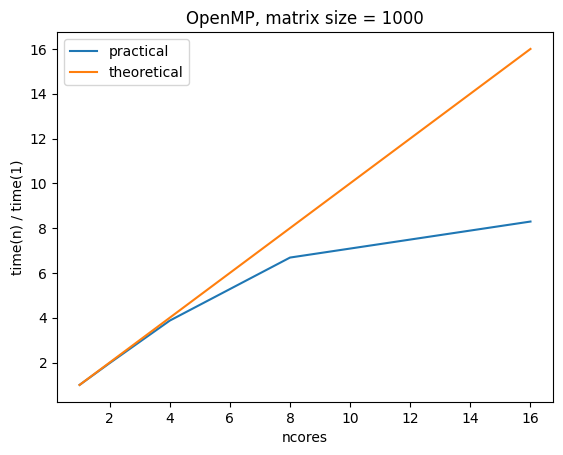

In [11]:
plotting_openmp(ncores, openmp_1000, 'OpenMP, matrix size = 1000', 'ncores', 'time(n) / time(1)')

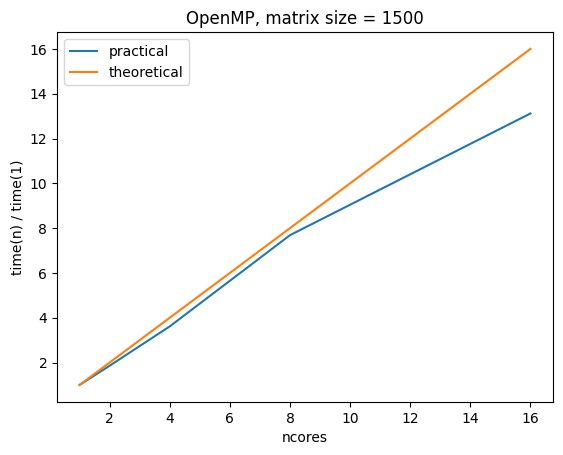

In [12]:
plotting_openmp(ncores, openmp_1500, 'OpenMP, matrix size = 1500', 'ncores', 'time(n) / time(1)')

In [13]:
ncores = np.array([int(elem.split()[1][:-1]) for elem in openmp_1500_any_cpus])
times = np.array([float(elem.split()[4])/1e6 for elem in openmp_1500_any_cpus])

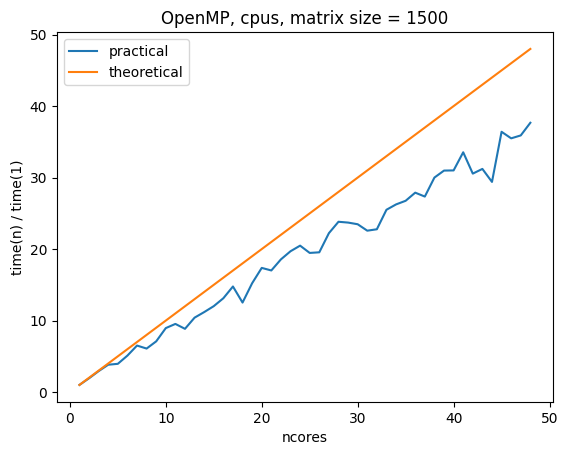

In [17]:
plotting_openmp(ncores, times, 'OpenMP, cpus, matrix size = 1500', 'ncores', 'time(n) / time(1)')

In [18]:
times_1500_any = np.array([float(elem.split()[4])/1e6 for elem in openmp_1500_any])

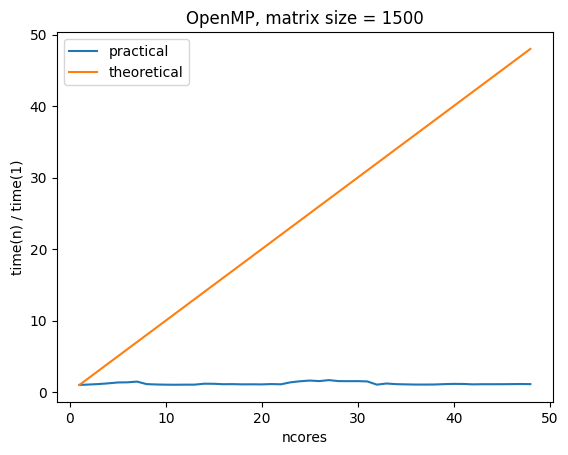

In [19]:
plotting_openmp(ncores, times_1500_any, 'OpenMP, matrix size = 1500', 'ncores', 'time(n) / time(1)')

In [21]:
times_1000_any = np.array([float(elem.split()[4])/1e6 for elem in openmp_1000_any])

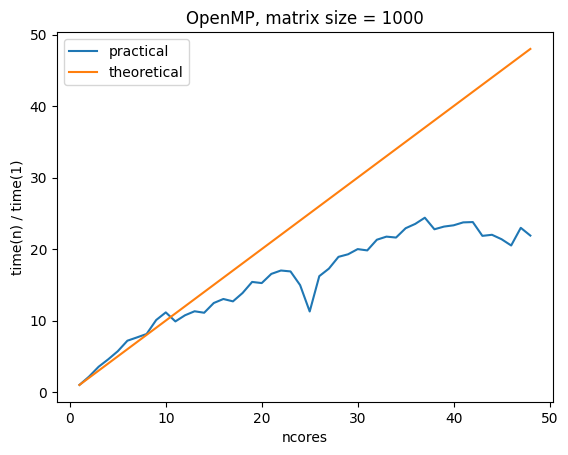

In [22]:
plotting_openmp(ncores, times_1000_any, 'OpenMP, matrix size = 1000', 'ncores', 'time(n) / time(1)')